In [4]:

import pandas as pd

penguins = pd.read_csv("C:\\Users\\aitma\\Downloads\\TP0 Linear regression\\penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data

,Flipper Length (mm)
0,181.0
1,186.0
2,195.0
3,193.0
4,190.0
...,...
337,207.0
338,202.0
339,193.0
340,210.0


In [5]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

<h2>L'instance linear_regression stockera les valeurs des paramètres dans les attributs coef_ et intercept_. On peut afficher les maramètres du modèle optimal trouvé :</h2>

In [8]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610009

In [13]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077063

In [14]:
import numpy as np
#linspace is a function that generate 300 values from data.min to data.max 
flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass)

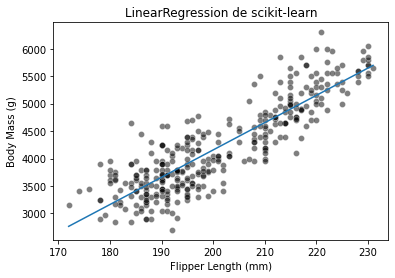

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("LinearRegression de scikit-learn")

In [16]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"L'erreur quadratique moyenne du modèle est  {model_error:.2f}")

L'erreur quadratique moyenne du modèle est  154546.19


<h4>Un modèle de régression linéaire minimise l'erreur quadratique moyenne sur l'ensemble d'apprentissage. Cela signifie que les paramètres obtenus après l'ajustement (c'est-à-dire coef_ et intercept_) sont les paramètres optimaux qui minimisent l'erreur quadratique moyenne. En d'autres termes, tout autre choix de paramètres donnera un modèle avec une erreur quadratique moyenne plus élevée sur l'ensemble d'apprentissage.</h4>

<h4>Cependant, l'erreur quadratique moyenne est difficile à interpréter. L'erreur absolue moyenne est plus intuitive puisqu'elle fournit une erreur dans la même unité que celle de la cible.
</h4>

In [17]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"l'erreur absolue moyenne du modèle est : {model_error:.2f} g")

l'erreur absolue moyenne du modèle est : 313.00 g


<h4>Une erreur absolue moyenne de 313 signifie qu'en moyenne, notre modèle fait une erreur de +/- 313 grammes lors de la prédiction de la masse corporelle d'un pingouin compte tenu de la longueur de ses nageoires.</h4>